In [3]:
import pandas
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
Data = pandas.read_json(r"C:\Users\ng_zh\Downloads\Bluesg")

In [5]:
ToClean = pandas.DataFrame(Data['stations']).reset_index()
ToClean.head()

,index,stations
0,angmokio-angmokioav4-blk157,"{'data': {'0': {'0': {'18615': {'cars': 0, 'sl..."
1,angmokio-angmokioave10-blk410,"{'data': {'0': {'0': {'18629': {'cars': 0, 'sl..."
2,angmokio-angmokioavenue10-blk449,"{'data': {'0': {'0': {'18587': {'cars': 0, 'sl..."
3,angmokio-angmokioavenue10-blk544,"{'data': {'0': {'0': {'18587': {'cars': 0, 'sl..."
4,angmokio-angmokioavenue10-blk559,"{'data': {'0': {'0': {'18594': {'cars': 1, 'sl..."


In [6]:
NewData = pandas.json_normalize(ToClean['stations']).T
NewData = NewData.reset_index()
NewData.columns = NewData.iloc[0]
NewData = NewData[1:]
NewData

,name,Ang Mo Kio/Ang Mo Kio Av 4/Blk 157,Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 559,Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 110,Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 114,Ang Mo Kio/Ang Mo Kio Avenue 5/Blk 605,Ang Mo Kio/Ang Mo Kio Avenue 6/Blk 123,...,Yishun/Yishun Street 41/Blk 456A/Deck 1B,Yishun/Yishun Street 51/Blk 501/Deck 1A,Yishun/Yishun Street 51/Blk 504/Deck 2,Yishun/Yishun Street 51/Blk 512/Deck 1A,Yishun/Yishun Street 51/Blk 513/Deck 2,Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A,Bukit Merah/Henderson Road/Blk 96/Deck 1A,Bukit Merah/Telok Blangah Rise/Blk 32,Punggol/Punggol Field/Blk 204/Deck B1,Tampines/Tampines Avenue 8/Blk 879C/Deck 1A
1,data.0.0.18615.cars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,data.0.0.18615.slots,3.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,...,3.0,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
3,data.0.0.18664.cars,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data.0.0.18664.slots,3.0,3.0,2.0,3.0,3.0,3.0,0.0,1.0,3.0,...,2.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0
5,data.0.0.18678.cars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60218,data.6.95.18888.slots,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,...,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
60219,data.6.95.18895.cars,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,2.0
60220,data.6.95.18895.slots,3.0,0.0,3.0,3.0,2.0,4.0,4.0,1.0,2.0,...,0.0,2.0,1.0,2.0,4.0,0.0,0.0,3.0,4.0,0.0
60221,location.lat,1.375145,1.363232,1.36805,1.373765,1.371022,1.370557,1.372293,1.37925,1.370392,...,1.419846,1.416572,1.418416,1.41461,1.415984,1.358769,1.287793,1.273125,1.398494,1.351144


In [7]:
NewData = NewData['name'].str.split('.',expand = True).join(NewData)
NewData

,0,1,2,3,4,name,Ang Mo Kio/Ang Mo Kio Av 4/Blk 157,Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544,...,Yishun/Yishun Street 41/Blk 456A/Deck 1B,Yishun/Yishun Street 51/Blk 501/Deck 1A,Yishun/Yishun Street 51/Blk 504/Deck 2,Yishun/Yishun Street 51/Blk 512/Deck 1A,Yishun/Yishun Street 51/Blk 513/Deck 2,Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A,Bukit Merah/Henderson Road/Blk 96/Deck 1A,Bukit Merah/Telok Blangah Rise/Blk 32,Punggol/Punggol Field/Blk 204/Deck B1,Tampines/Tampines Avenue 8/Blk 879C/Deck 1A
1,data,0,0,18615,cars,data.0.0.18615.cars,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,data,0,0,18615,slots,data.0.0.18615.slots,3.0,4.0,2.0,4.0,...,3.0,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
3,data,0,0,18664,cars,data.0.0.18664.cars,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,data,0,0,18664,slots,data.0.0.18664.slots,3.0,3.0,2.0,3.0,...,2.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0
5,data,0,0,18678,cars,data.0.0.18678.cars,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60218,data,6,95,18888,slots,data.6.95.18888.slots,4.0,4.0,4.0,3.0,...,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
60219,data,6,95,18895,cars,data.6.95.18895.cars,0.0,1.0,0.0,1.0,...,3.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,2.0
60220,data,6,95,18895,slots,data.6.95.18895.slots,3.0,0.0,3.0,3.0,...,0.0,2.0,1.0,2.0,4.0,0.0,0.0,3.0,4.0,0.0
60221,location,lat,None,None,None,location.lat,1.375145,1.363232,1.36805,1.373765,...,1.419846,1.416572,1.418416,1.41461,1.415984,1.358769,1.287793,1.273125,1.398494,1.351144


In [8]:
NewData = NewData.drop([0, 'name'], axis=1).iloc[:-2]
NewData = NewData.rename(columns={1: "Day" , 2: "Time", 3: "Date" ,4: "Header"})
NewData

,Day,Time,Date,Header,Ang Mo Kio/Ang Mo Kio Av 4/Blk 157,Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 559,Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 110,...,Yishun/Yishun Street 41/Blk 456A/Deck 1B,Yishun/Yishun Street 51/Blk 501/Deck 1A,Yishun/Yishun Street 51/Blk 504/Deck 2,Yishun/Yishun Street 51/Blk 512/Deck 1A,Yishun/Yishun Street 51/Blk 513/Deck 2,Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A,Bukit Merah/Henderson Road/Blk 96/Deck 1A,Bukit Merah/Telok Blangah Rise/Blk 32,Punggol/Punggol Field/Blk 204/Deck B1,Tampines/Tampines Avenue 8/Blk 879C/Deck 1A
1,0,0,18615,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,0,0,18615,slots,3.0,4.0,2.0,4.0,4.0,4.0,...,3.0,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
3,0,0,18664,cars,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,18664,slots,3.0,3.0,2.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0
5,0,0,18678,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,6,95,18881,slots,1.0,3.0,4.0,4.0,4.0,2.0,...,2.0,3.0,2.0,1.0,3.0,0.0,0.0,4.0,2.0,0.0
60217,6,95,18888,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60218,6,95,18888,slots,4.0,4.0,4.0,3.0,3.0,3.0,...,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
60219,6,95,18895,cars,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,2.0


In [9]:
NewData['Day'][NewData['Day'] == '0'] = 'Monday'
NewData['Day'][NewData['Day'] == '1'] = 'Tuesday'
NewData['Day'][NewData['Day'] == '2'] = 'Wednesday'
NewData['Day'][NewData['Day'] == '3'] = 'Thursday'
NewData['Day'][NewData['Day'] == '4'] = 'Friday'
NewData['Day'][NewData['Day'] == '5'] = 'Saturday'
NewData['Day'][NewData['Day'] == '6'] = 'Sunday'
NewData

,Day,Time,Date,Header,Ang Mo Kio/Ang Mo Kio Av 4/Blk 157,Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 559,Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 110,...,Yishun/Yishun Street 41/Blk 456A/Deck 1B,Yishun/Yishun Street 51/Blk 501/Deck 1A,Yishun/Yishun Street 51/Blk 504/Deck 2,Yishun/Yishun Street 51/Blk 512/Deck 1A,Yishun/Yishun Street 51/Blk 513/Deck 2,Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A,Bukit Merah/Henderson Road/Blk 96/Deck 1A,Bukit Merah/Telok Blangah Rise/Blk 32,Punggol/Punggol Field/Blk 204/Deck B1,Tampines/Tampines Avenue 8/Blk 879C/Deck 1A
1,Monday,0,18615,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Monday,0,18615,slots,3.0,4.0,2.0,4.0,4.0,4.0,...,3.0,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
3,Monday,0,18664,cars,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Monday,0,18664,slots,3.0,3.0,2.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0
5,Monday,0,18678,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,Sunday,95,18881,slots,1.0,3.0,4.0,4.0,4.0,2.0,...,2.0,3.0,2.0,1.0,3.0,0.0,0.0,4.0,2.0,0.0
60217,Sunday,95,18888,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60218,Sunday,95,18888,slots,4.0,4.0,4.0,3.0,3.0,3.0,...,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
60219,Sunday,95,18895,cars,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,2.0


In [10]:
NewData['Time'] = NewData['Time'].astype(int) * 15 / 60
Minutes = pandas.DataFrame([int(int(Minute[1])/100*60) for Minute in NewData['Time'].astype(str).str.split(".")])
Hours = pandas.DataFrame([Hour[0] for Hour in NewData['Time'].astype(str).str.split(".")])
Time = Hours[0].astype(str) + ":" + Minutes[0].astype(str)
Time.index += 1 
NewData['Time'] = Time
NewData['Date'] = datetime.datetime(1970, 1, 1) + NewData['Date'].astype(int).map(datetime.timedelta)
NewData

,Day,Time,Date,Header,Ang Mo Kio/Ang Mo Kio Av 4/Blk 157,Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544,Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 559,Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 110,...,Yishun/Yishun Street 41/Blk 456A/Deck 1B,Yishun/Yishun Street 51/Blk 501/Deck 1A,Yishun/Yishun Street 51/Blk 504/Deck 2,Yishun/Yishun Street 51/Blk 512/Deck 1A,Yishun/Yishun Street 51/Blk 513/Deck 2,Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A,Bukit Merah/Henderson Road/Blk 96/Deck 1A,Bukit Merah/Telok Blangah Rise/Blk 32,Punggol/Punggol Field/Blk 204/Deck B1,Tampines/Tampines Avenue 8/Blk 879C/Deck 1A
1,Monday,0:0,2020-12-19,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Monday,0:0,2020-12-19,slots,3.0,4.0,2.0,4.0,4.0,4.0,...,3.0,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
3,Monday,0:0,2021-02-06,cars,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Monday,0:0,2021-02-06,slots,3.0,3.0,2.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0
5,Monday,0:0,2021-02-20,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,Sunday,23:45,2021-09-11,slots,1.0,3.0,4.0,4.0,4.0,2.0,...,2.0,3.0,2.0,1.0,3.0,0.0,0.0,4.0,2.0,0.0
60217,Sunday,23:45,2021-09-18,cars,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60218,Sunday,23:45,2021-09-18,slots,4.0,4.0,4.0,3.0,3.0,3.0,...,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
60219,Sunday,23:45,2021-09-25,cars,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,0.0,2.0


In [11]:
Data = NewData


In [13]:
Minutes = [Min[1] for Min in Data['Time'].astype(str).str.split(':')]
Minutes = pandas.DataFrame(list(map(lambda x: x.replace('3', '30'), Minutes)), dtype = str)
Hours = pandas.DataFrame([Hour[0] for Hour in Data['Time'].str.split(':')])
Time = pandas.DataFrame(Hours + ":" + Minutes)
Time.index += 1
Data['Time'] = Time.iloc[:,0]
Data.insert(loc = 2, column = 'New Date', value = pandas.to_datetime(Data['Date'].astype(str) + Data['Time'], format='%Y-%m-%d%H:%M') )
Data = Data.drop(columns=['Time', 'Date'])
Data

In [16]:
Data.columns

Index(['Day', 'New Date', 'Header', 'Ang Mo Kio/Ang Mo Kio Av 4/Blk 157',
       'Ang Mo Kio/Ang Mo Kio Ave 10/Blk 410',
       'Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 449',
       'Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 544',
       'Ang Mo Kio/Ang Mo Kio Avenue 10/Blk 559',
       'Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 110',
       'Ang Mo Kio/Ang Mo Kio Avenue 4/Blk 114',
       ...
       'Yishun/Yishun Street 41/Blk 456A/Deck 1B',
       'Yishun/Yishun Street 51/Blk 501/Deck 1A',
       'Yishun/Yishun Street 51/Blk 504/Deck 2',
       'Yishun/Yishun Street 51/Blk 512/Deck 1A',
       'Yishun/Yishun Street 51/Blk 513/Deck 2',
       'Bukit Batok/Bukit Batok West Avenue 5/Blk 436/Deck 1A',
       'Bukit Merah/Henderson Road/Blk 96/Deck 1A',
       'Bukit Merah/Telok Blangah Rise/Blk 32',
       'Punggol/Punggol Field/Blk 204/Deck B1',
       'Tampines/Tampines Avenue 8/Blk 879C/Deck 1A'],
      dtype='object', length=387)

In [17]:
JurongWest = [Column for Column in Data.columns if 'Jurong West' in Column]
JurongWest

['Jurong West/Boon Lay Drive/Blk 188',
 'Jurong West/Boon Lay Drive/Blk 196/Deck 1A',
 'Jurong West/Boon Lay Drive/Blk 268/Deck 1A',
 'Jurong West/Jurong West Central 3/Blk 697/Deck 1B',
 'Jurong West/Jurong West St 61/Blk 624A/Deck 1A',
 'Jurong West/Jurong West Street 24/Blk 271/Deck 1B',
 'Jurong West/Jurong West Street 25/Blk 276/Deck 2A',
 'Jurong West/Jurong West Street 64/Blk 684/Deck 1',
 'Jurong West/Jurong West Street 65/Blk 659/Deck 2A',
 'Jurong West/Jurong West Street 73/Blk 734A/Deck 1B',
 'Jurong West/Jurong West Street 81/Blk 832A/Deck Basement',
 'Jurong West/Jurong West Street 81/Blk 854A/Deck 1A',
 'Jurong West/Jurong West Street 91/Blk 903',
 'Jurong West/Jurong West Street 91/Blk 953',
 'Jurong West/Jurong West Street 93/Blk 986/Deck 1A',
 'Jurong West/Kang Ching Road/Blk 346A/Deck 1B',
 'Jurong West/Yuan Ching Road/Blk 138/Deck 1A',
 'Jurong West/Yung An Road/Blk 364/Deck 1A',
 'Jurong West/Yung Kuang Rd/Blk 175/Deck A1']

In [28]:
NearestToNTU = Data[['Day', 'New Date', 'Header','Jurong West/Jurong West Street 91/Blk 953']]
NearestToNTU = NearestToNTU.rename(columns={"New Date": "Date", "Jurong West/Jurong West Street 91/Blk 953": "Value"})
NearestToNTUCar = NearestToNTU[NearestToNTU['Header'] == 'cars'].reset_index(drop=True)
NearestToNTUSlots = NearestToNTU[NearestToNTU['Header'] == 'slots'].reset_index(drop=True)

In [29]:
NearestToNTUCar

,Day,Date,Header,Value
0,Monday,2020-12-19 00:00:00,cars,1.0
1,Monday,2021-02-06 00:00:00,cars,0.0
2,Monday,2021-02-20 00:00:00,cars,1.0
3,Monday,2020-11-28 00:00:00,cars,1.0
4,Monday,2021-01-02 00:00:00,cars,2.0
...,...,...,...,...
30105,Sunday,2021-08-28 23:45:00,cars,1.0
30106,Sunday,2021-09-04 23:45:00,cars,2.0
30107,Sunday,2021-09-11 23:45:00,cars,2.0
30108,Sunday,2021-09-18 23:45:00,cars,0.0


In [31]:
NearestToNTUCar = NearestToNTUCar.groupby(by=[NearestToNTUCar['Date'].dt.date]).mean()
NearestToNTUCar = NearestToNTUCar.rename(columns={"Value": "Car"})
NearestToNTUSlots = NearestToNTUSlots.groupby(by=[NearestToNTUSlots['Date'].dt.date]).mean()
NearestToNTUSlots = NearestToNTUSlots.rename(columns={"Value": "Slots"})

In [33]:
NearestToNTUSlots = NearestToNTUSlots.drop(columns = 'Date')
NearestToNTUCar = NearestToNTUCar.drop(columns = 'Date')

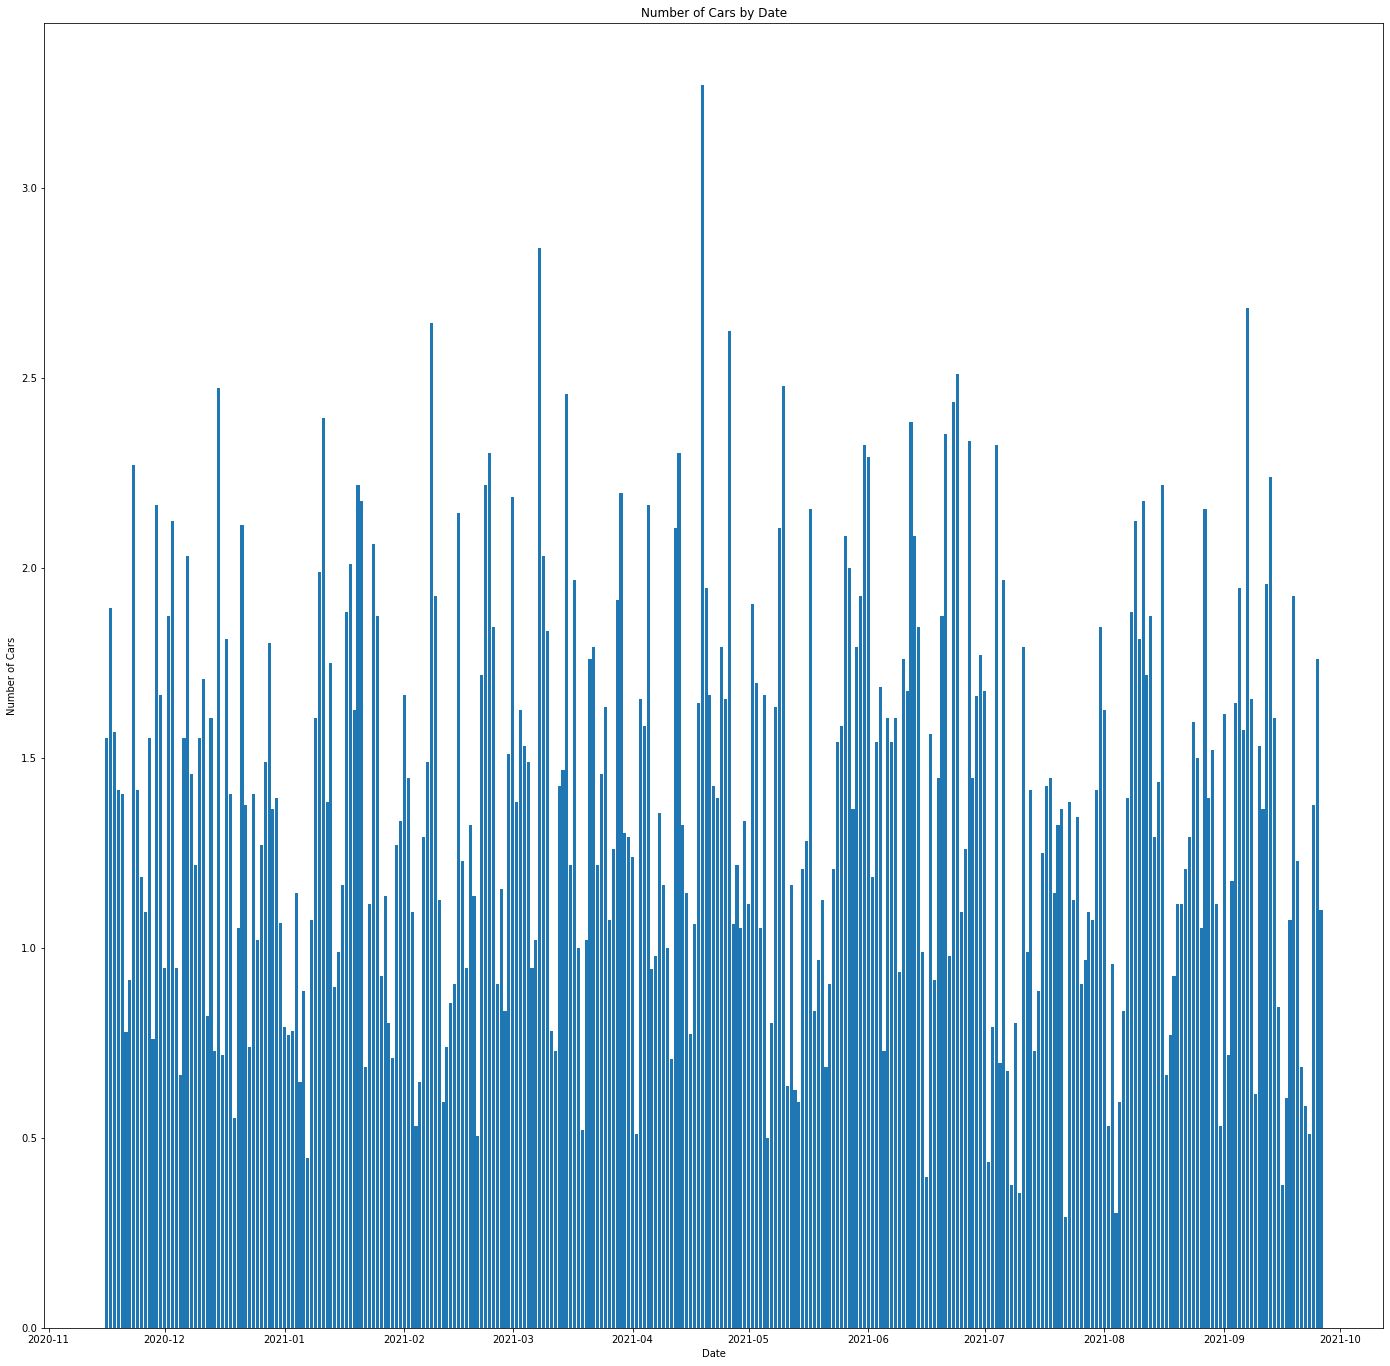

In [34]:
plt.figure(figsize=(24,24))
plt.bar(NearestToNTUCar.index, NearestToNTUCar['Car'])
plt.title('Number of Cars by Date')
plt.xlabel('Date')
plt.ylabel('Number of Cars')
plt.show()

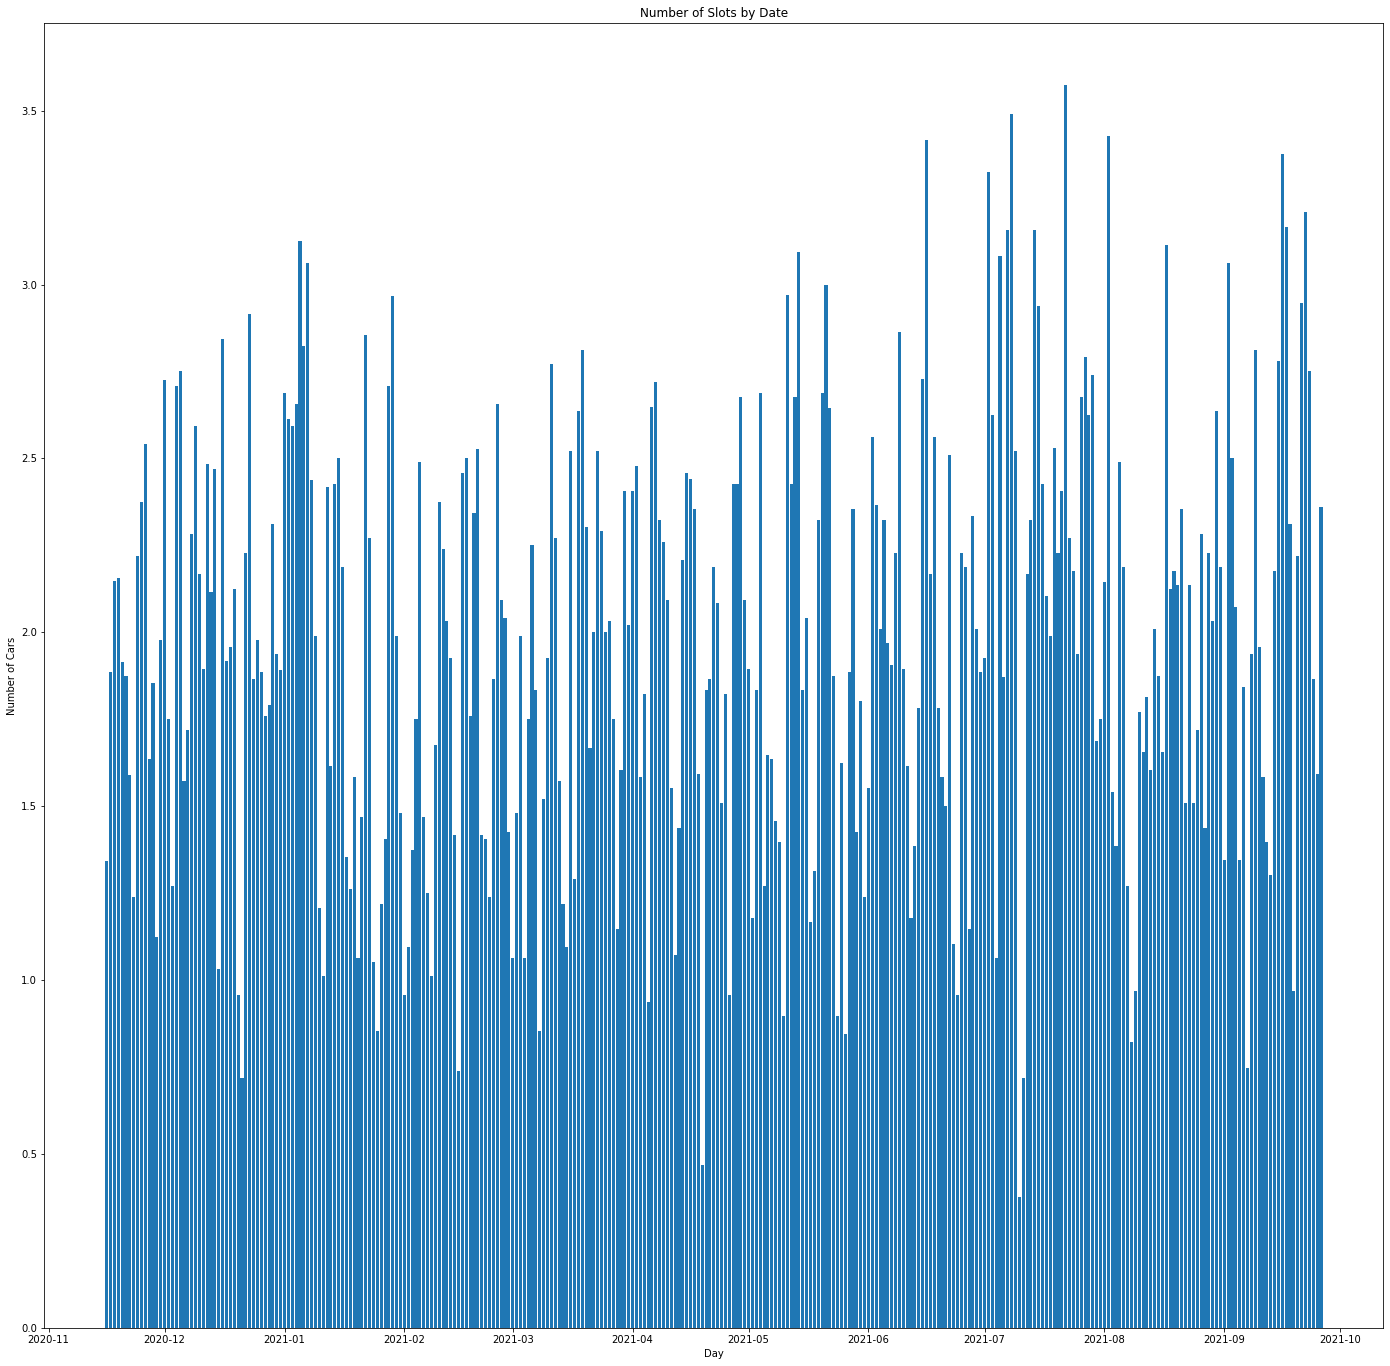

In [35]:
plt.figure(figsize=(24,24))
plt.bar(NearestToNTUSlots.index, NearestToNTUSlots['Slots'])
plt.title('Number of Slots by Date')
plt.xlabel('Day')
plt.ylabel('Number of Cars')
plt.show()

          Slots       Car
Slots  1.000000 -0.749293
Car   -0.749293  1.000000


<AxesSubplot:>

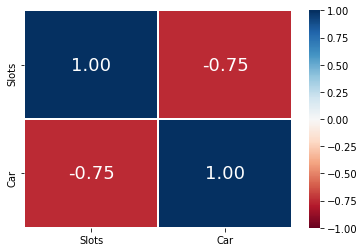

In [36]:
Correlation = pandas.concat([NearestToNTUSlots, NearestToNTUCar], axis = 1).reindex(NearestToNTUCar.index)
print(Correlation.corr())

# Heatmap of the Correlation Matrix
sb.heatmap(Correlation.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [37]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [38]:
def create_dataset(dataset, PreviousDays=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-PreviousDays-1):
        a = dataset[i:(i+PreviousDays), 0]
        dataX.append(a)
        dataY.append(dataset[i + PreviousDays, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [39]:
NearestToNTUSlots

,Slots
Date,
2020-11-16,1.342105
2020-11-17,1.885417
2020-11-18,2.147368
2020-11-19,2.156250
2020-11-20,1.914894
...,...
2021-09-22,3.208333
2021-09-23,2.750000
2021-09-24,1.864583


In [40]:
Dataset = NearestToNTUCar.values.astype('float32')

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(Dataset)

In [42]:
train_size = int(len(Dataset) * 0.8)
test_size = len(Dataset) - train_size
train, test = Dataset[0:train_size,:], Dataset[train_size:len(Dataset),:]

In [43]:
Daybehind = 3
trainX, trainY = create_dataset(train, Daybehind)
testX, testY = create_dataset(test, Daybehind)

In [44]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [45]:
model = Sequential()
model.add(LSTM(4, input_shape=(Daybehind, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

Epoch 1/30
248/248 - 1s - loss: 0.0754
Epoch 2/30
248/248 - 0s - loss: 0.0344
Epoch 3/30
248/248 - 0s - loss: 0.0342
Epoch 4/30
248/248 - 0s - loss: 0.0345
Epoch 5/30
248/248 - 0s - loss: 0.0344
Epoch 6/30
248/248 - 0s - loss: 0.0342
Epoch 7/30
248/248 - 0s - loss: 0.0343
Epoch 8/30
248/248 - 0s - loss: 0.0341
Epoch 9/30
248/248 - 0s - loss: 0.0331
Epoch 10/30
248/248 - 0s - loss: 0.0342
Epoch 11/30
248/248 - 0s - loss: 0.0338
Epoch 12/30
248/248 - 0s - loss: 0.0343
Epoch 13/30
248/248 - 0s - loss: 0.0339
Epoch 14/30
248/248 - 0s - loss: 0.0340
Epoch 15/30
248/248 - 0s - loss: 0.0341
Epoch 16/30
248/248 - 0s - loss: 0.0339
Epoch 17/30
248/248 - 0s - loss: 0.0338
Epoch 18/30
248/248 - 0s - loss: 0.0341
Epoch 19/30
248/248 - 0s - loss: 0.0337
Epoch 20/30
248/248 - 0s - loss: 0.0340
Epoch 21/30
248/248 - 0s - loss: 0.0342
Epoch 22/30
248/248 - 0s - loss: 0.0338
Epoch 23/30
248/248 - 0s - loss: 0.0337
Epoch 24/30
248/248 - 0s - loss: 0.0340
Epoch 25/30
248/248 - 0s - loss: 0.0339
Epoch 26/

In [46]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [47]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [48]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.55 RMSE
Test Score: 0.54 RMSE


In [49]:
trainPredictPlot = numpy.empty_like(Dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[Daybehind:len(trainPredict)+Daybehind, :] = trainPredict

In [50]:
testPredictPlot = numpy.empty_like(Dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(Daybehind*2)+1:len(Dataset)-1, :] = testPredict

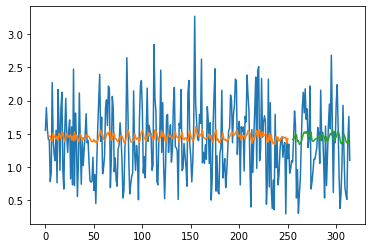

In [51]:
plt.plot(scaler.inverse_transform(Dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
print("% avaliblity of cars for "+ str(NearestToNTUSlots.index[-1]) + ": "+ str(testPredict[0][0]/4 * 100) + "%")

% avaliblity of cars for 2021-09-26: 35.3740930557251%
